# 🔁 Demonstrating RNN Problems with Long-Term Dependencies
This notebook illustrates how standard RNNs struggle with learning long-term dependencies using a toy example.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## 📦 Generate Synthetic Sequence Dataset
We'll generate sequences where the label depends only on the **first** element of the sequence — not the recent inputs.

In [10]:
def generate_sequence_data(num_sequences=1000, seq_length=300):
    X = torch.randint(0, 2, (num_sequences, seq_length)).float()
    y = X[:, 0]  # label depends only on the first token
    return X.unsqueeze(-1), y

X, y = generate_sequence_data()
print(X.shape)  # [1000, 100, 1]

torch.Size([1000, 300, 1])


## 🧠 Define a Simple RNN Model

In [12]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=16):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        return torch.sigmoid(self.fc(out[:, -1, :]))  # use final hidden state

## 🏋️ Train the RNN and Observe Performance

In [13]:
model = SimpleRNN()
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

losses = []
for epoch in range(20):
    pred = model(X).squeeze()
    loss = loss_fn(pred, y)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 0.6977
Epoch 2, Loss: 0.6935
Epoch 3, Loss: 0.6934
Epoch 4, Loss: 0.6941
Epoch 5, Loss: 0.6936
Epoch 6, Loss: 0.6930
Epoch 7, Loss: 0.6928
Epoch 8, Loss: 0.6928
Epoch 9, Loss: 0.6929
Epoch 10, Loss: 0.6929
Epoch 11, Loss: 0.6929
Epoch 12, Loss: 0.6928
Epoch 13, Loss: 0.6927
Epoch 14, Loss: 0.6926
Epoch 15, Loss: 0.6926
Epoch 16, Loss: 0.6925
Epoch 17, Loss: 0.6925
Epoch 18, Loss: 0.6925
Epoch 19, Loss: 0.6924
Epoch 20, Loss: 0.6923


## 📉 Loss Over Epochs

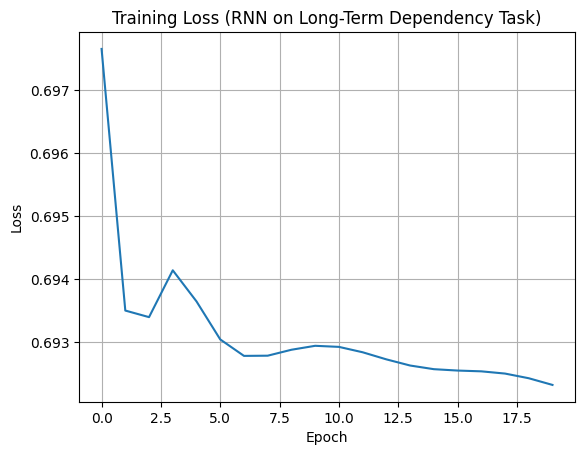

In [14]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss (RNN on Long-Term Dependency Task)")
plt.grid(True)
plt.show()

## ⚠️ Why RNN Fails Here
- The target depends only on the **first** input, but the model uses the **last** hidden state.
- As sequence length increases, information from earlier tokens **vanishes** due to repeated nonlinear transformations.
- This is known as the **vanishing gradient problem**.

> A solution? Use architectures like **LSTM** or **GRU** which are designed to retain long-term memory.